# **앙상블(Ensemble)**

> 여러 가지 우수한 학습 모델을 조합해 예측력을 향상시키는 모델

- 장점 : 단일 모델에 비해서 분류 성능 우수

- 단점 : 모델 결과의 해석이 어렵고, 예측 시간이 많이 소요됨

- 앙상블 알고리즘 : 배깅(Bagging), 부스팅(Boosting)

- 부스팅(Boosting)은 맞추기 어려운 문제를 맞추는데 초점을 둠

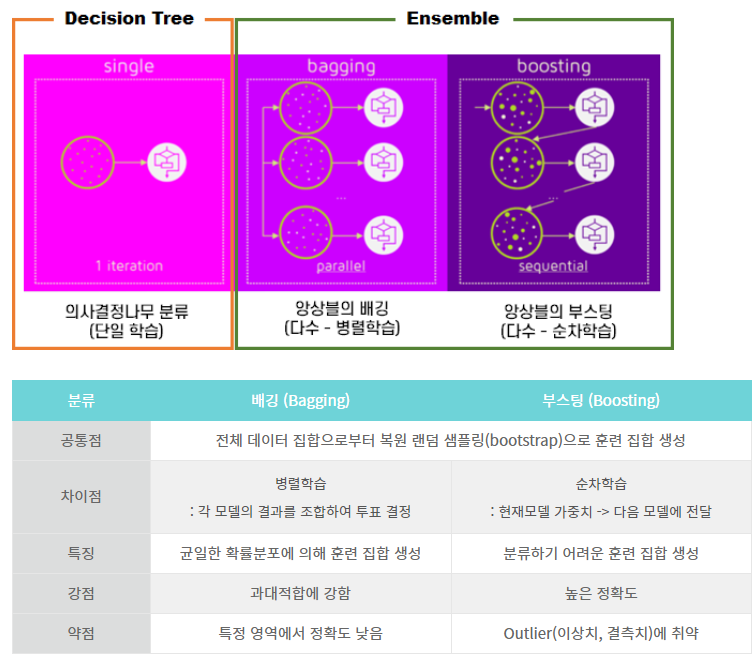

## 배깅(Bagging)

> 학습 데이터 세트에 총 1000개의 행이 있다고 해보자. 그러면 임의로 100개씩 행을 선택해서 의사결정 트리를 만드는 게 배깅(bagging)이다.

- Bootstrap Aggregating 의 줄임말 => Bagging  

- 부트스트랩을 통해서 조금씩 서로 다른 훈련 데이터를 생성하여 모델(훈련된 트리)을 생성하고, 결과를 결합(aggregating)시키는 방법

- 각 샘플의 결과변수(예측치)를 결합하는 방법은 결과변수가 연속형이면 평균(average), 범주형이면 다중 투표(majority vote) 사용

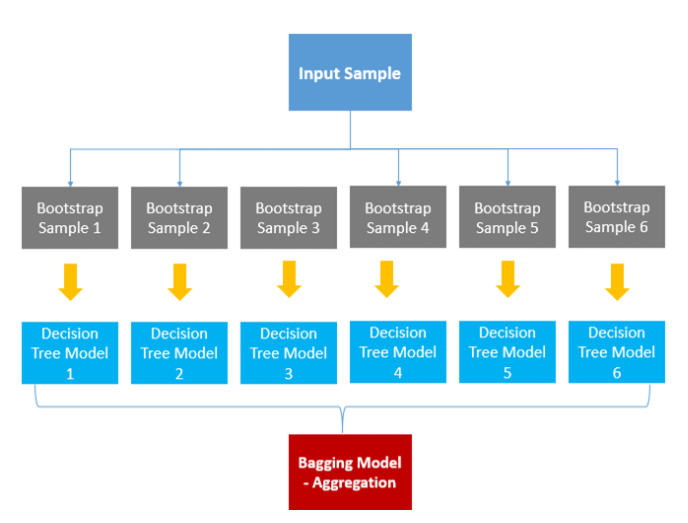

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, max_samples=100, n_jobs=-1
)

* max_samples=100 샘플수를 100개로 제한하겠다. 

* n_estimators=500 결정트리 500개의 앙상블로 훈련시키겠다. 

* n_jobs=-1 cpu의 코어수 제한하기 -1 컴퓨터의 코어 수 모두 사용하겠다라는 의미

* bootstrap=True sampling할때 중복을 허용하여 하겠다. 즉 bagging기법을 사용하겠다는 의미

### **랜덤 포레스트 (Random Forest)**

> 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 배깅 유형

- 분류, 회귀 분석 모두 가능 (분류, 회귀 등에서 가장 많이 사용)

- 별도 튜닝(스케일 조정) 과정 없음

- 장점 : 단일 트리 모델 단점 보완(성능, 과대적합)

- 단점 : 대용량 데이터 셋으로 처리시간 증가

- 멀티코어 프로세스 이용 병렬처리 가능

- 배깅과의 차이점 : 배깅은 샘플 복원 추출 시 모든 설명변수 사용 but 랜덤포레스트는 a개의 설명변수만 복원 추출

- 랜덤포레스트는 일반적으로 배깅보다 성능이 우수

  (설명변수가 많을 경우, 대체로 변수간 상관성이 높은 변수가 섞일 확률이 높은데 그 가능성을 제거하기 때문)

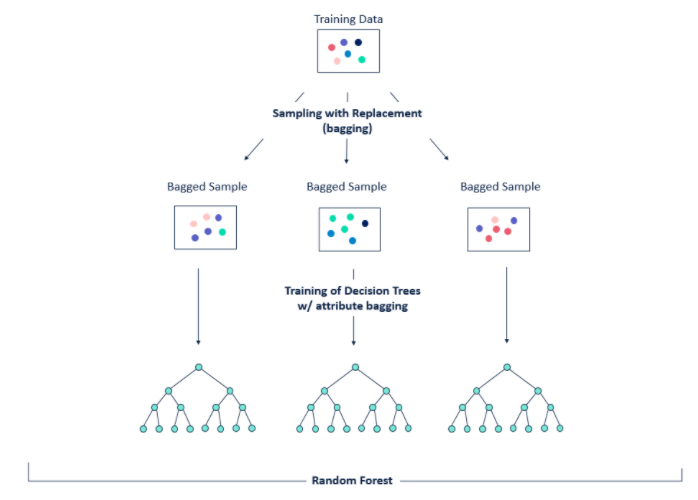

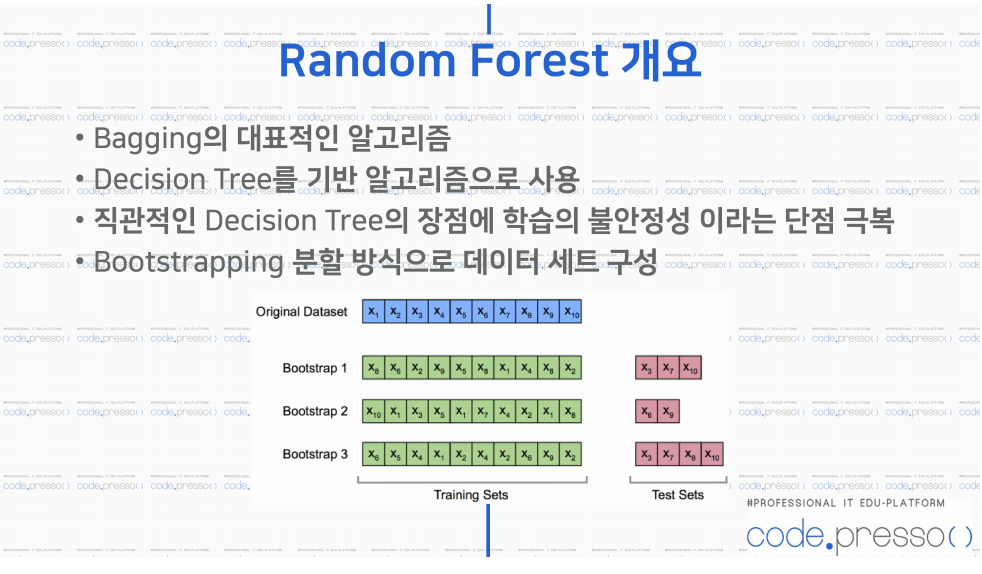

* **예제**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train,x_test, y_train,y_test = train_test_split(cancer.data, cancer.target,
                                                  test_size=0.2,
                                                  random_state= 156)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

print('Random Forest Accuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Random Forest Accuracy: 0.9561


## 부스팅(Boosting)

> 잘못 분류된 객체들에 집중하여 새로운 분류규칙을 생성하는 단계를 반복하는 알고리즘 (순차적 학습)

- 약한 예측모형들을 결합하여 강한 예측모형을 도출

- 오분류된 개체는 높은 가중치, 정분류된 개체는 낮은 가중치 적용 => 예측모형의 정확도 향상

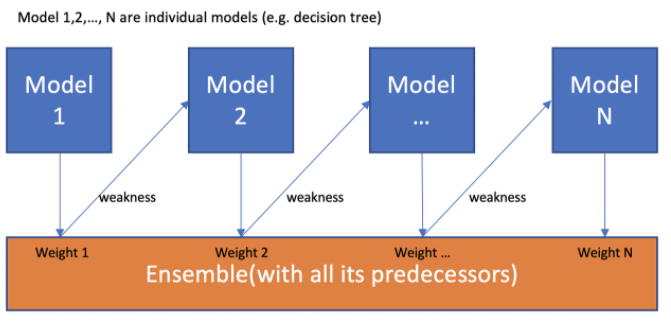

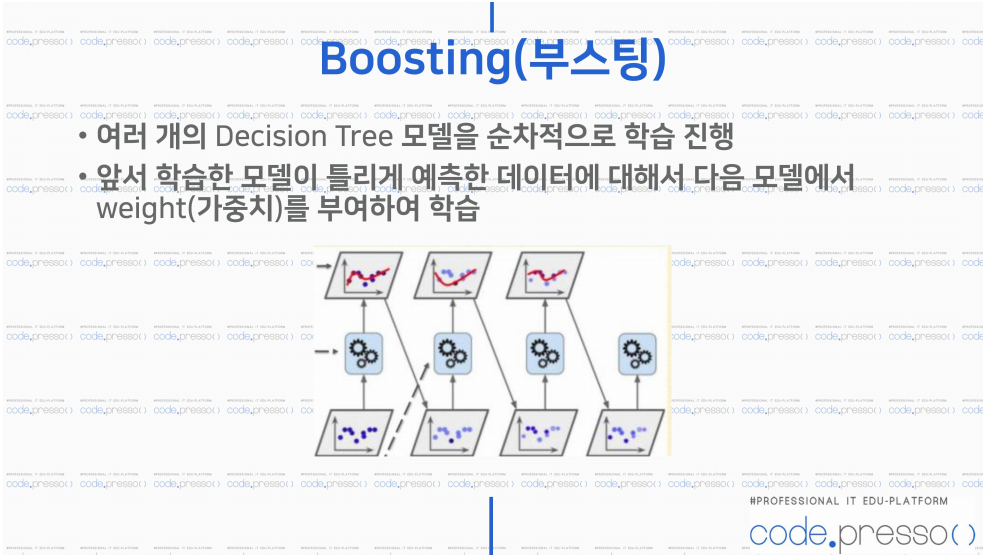

### AdaBoost

> Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함

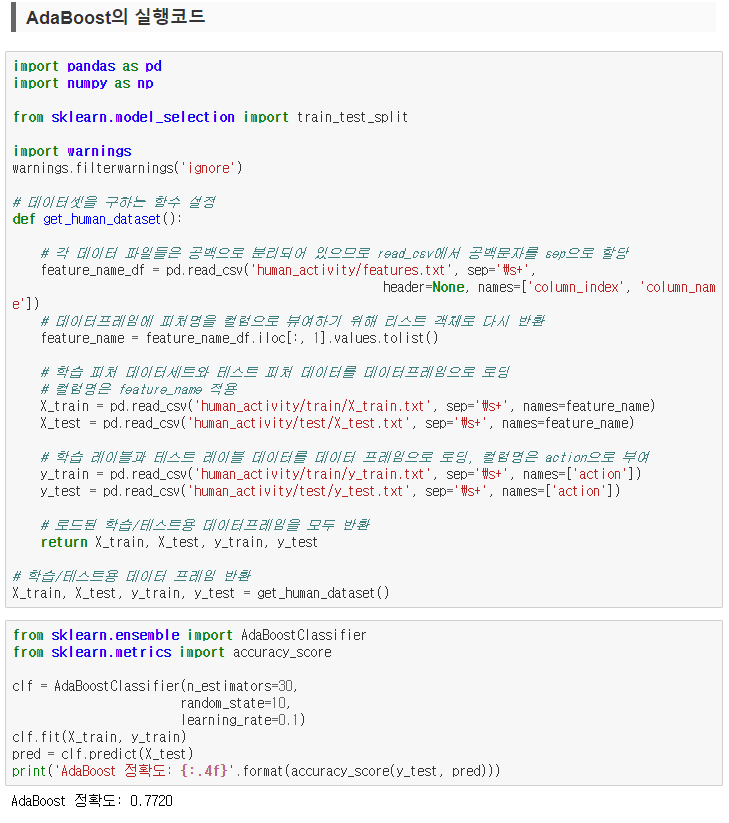

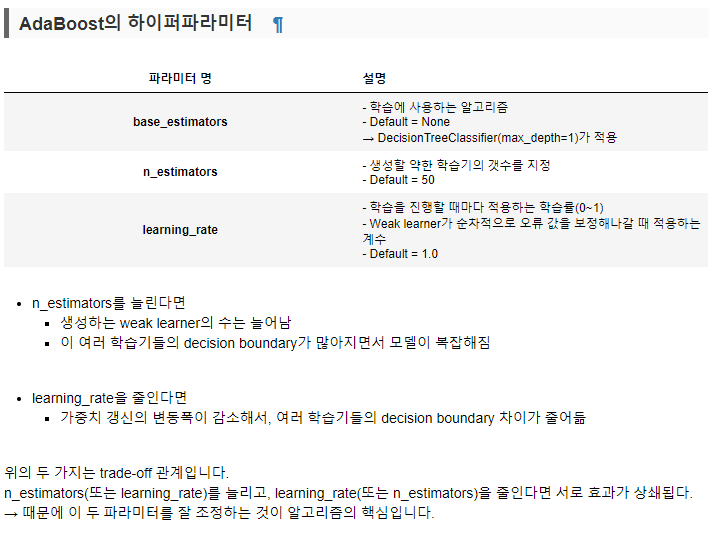

### GBM

* AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘입니다.
GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게되고, 시간이 오래 걸린다는 단점이 있습니다.

> 경사하강법
* 분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

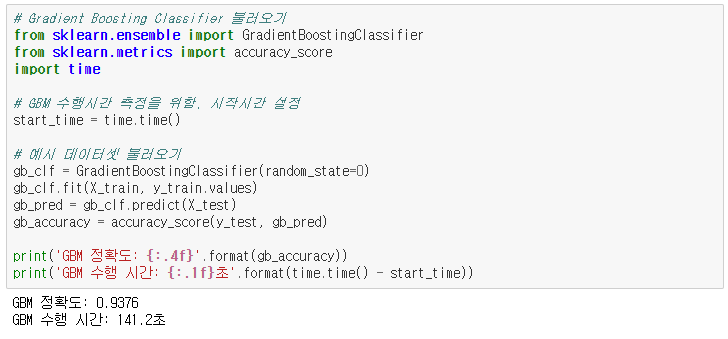

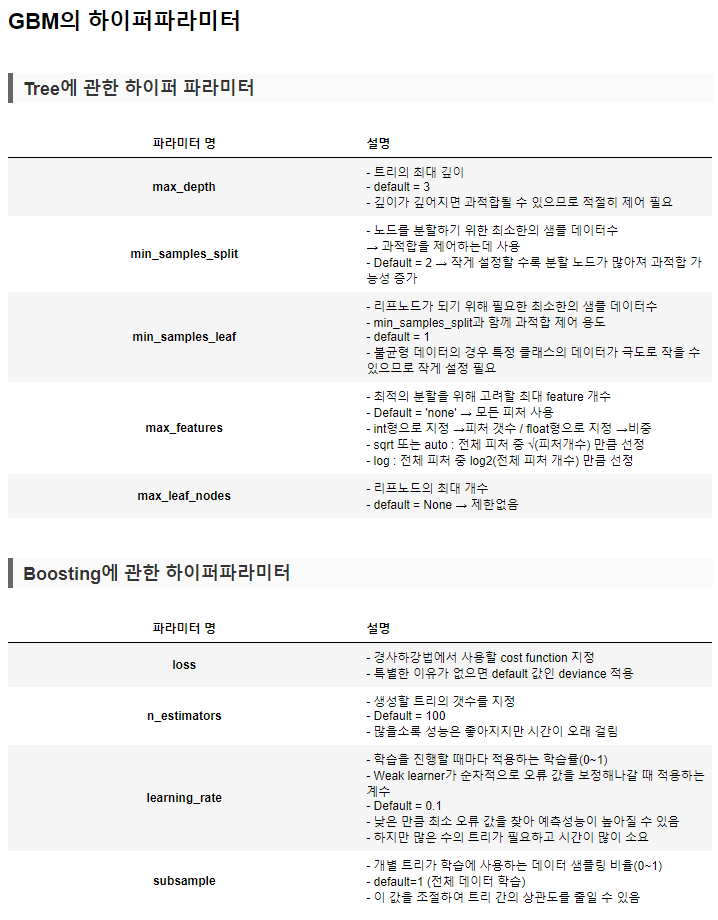

### XGBoost

* 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나입니다.
GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘입니다.

> **XGBoost의 주요장점**

1. 뛰어난 예측 성능
2. GBM 대비 빠른 수행 시간
3. 과적합 규제(Overfitting Regularization)
4. Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
5. 자체 내장된 교차 검증
 * 반복 수행시마다 내부적으로 교차검증을 수행해 최적회된 반복 수행횟수를 가질 수 있음
 * 지정된 반복횟수가 아니라 교차검증을 통해 평가 데이트세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 기능이 있음
6. 결손값 자체 처리

> **XGBoost의 하이퍼 파라미터**

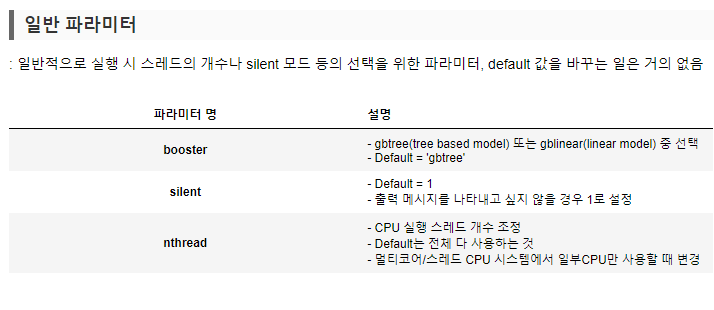

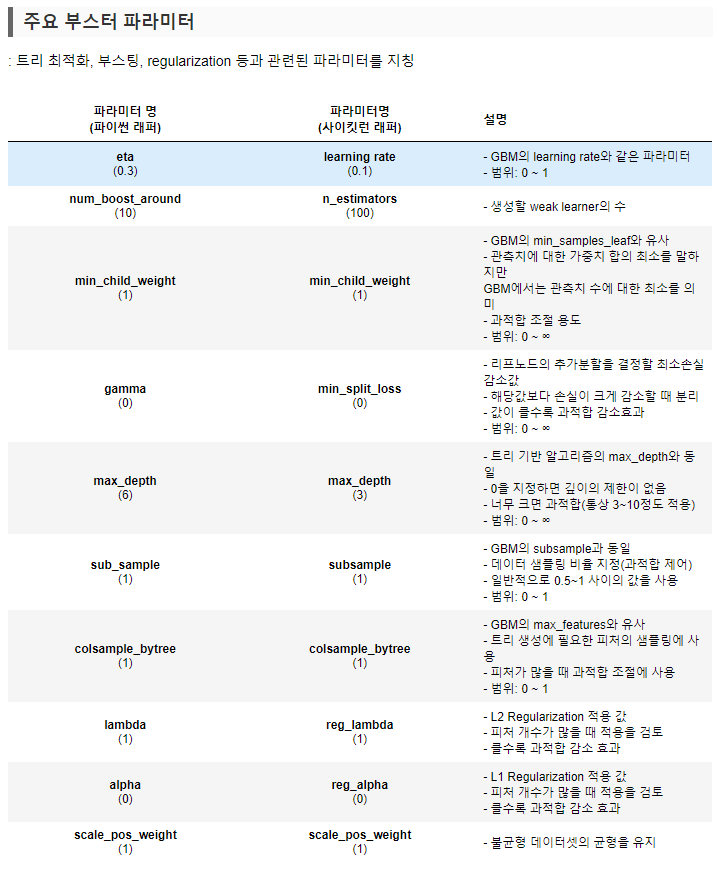

* **예제**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


### LightGBM

> LightGBM의 장점

1. XGBoost 대비 더 빠른 학습과 예측 수행 시간
2. 더 작은 메모리 사용량
3. 카테고리형 피처의 자동 변환과 최적 분할
 * : 원-핫인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드분할 수행

> LightGBM의 단점
* 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽습니다.
(공식 문서상 대략 10,000건 이하의 데이터 세트)

> 기존 GBM과의 차이점

* 일반적인 균형트리분할 (Level Wise) 방식과 달리 리프중심 트리분할(Leaf Wise) 방식을 사용합니다.

 * 균형트리분할은 최대한 균형 잡힌 트리를 유지하며 분할하여 트리의 깊이를 최소화하여
오버피팅에 강한구조이지만 균형을 맞추기 위한 시간이 필요합니다.
 * 리프중심 트리분할의 경우 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서
트리가 깊어지고 비대칭적으로 생성합니다. 이로써 예측 오류 손실을 최소화하고자 합니다.

> **LightGBM의 하이퍼 파라미터**

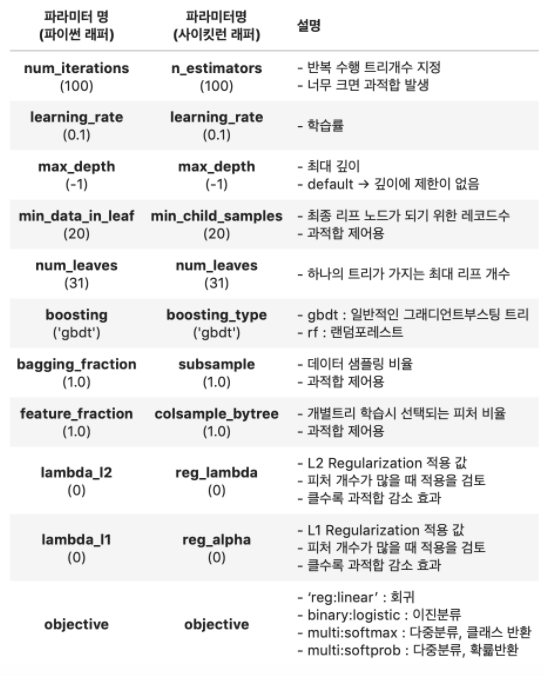

In [ ]:
import lightgbm
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


### Catboost

> CatBoost의 전체 이름은 Categorical Boost로 범주형 변수가 많은 데이터 셋에서 예측 성능이 특히 우수합니다.

* 높은 예측 성능
* 범주형 변수를 자동으로 전처리
* 모델 튜닝이 자동화 (범주 형 변수를 자동으로 전처리 해주니깐 그 부분에 따로 따를 할 필요 x)
* R 그리고 Python과 연동
* CatBoost 개발자에 성능 모델없이 기본값으로만 좋은 성능을 평가 고합니다. 또한 스크립트를 통해 얻을 수있는 효과는 크지 않다고합니다.

> Catboost의 한계
* Sparse 한 Matrix 는 처리하지 못한다.
* 데이터 대부분이 수치형 변수인 경우, Light GBM 보다 학습 속도가 느리다. (즉 대부분이 범주형 변수인 경우 쓰라는 말)


참고자료 : https://injo.tistory.com/category/Machine%20Learning/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%20%ED%95%99%EC%8A%B5